In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympics-medals-1896-2024/olympics_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/summer-olympics-medals-1896-2024/olympics_dataset.csv')

In [3]:
df

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [5]:
df.isna().sum()

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [6]:
df.columns.to_list()

['player_id',
 'Name',
 'Sex',
 'Team',
 'NOC',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [7]:
df.City.value_counts()

City
Tokyo             22823
London            22426
Paris             22061
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Beijing           13602
Barcelona         12977
Los Angeles       12423
Seoul             12037
Munich            10304
Montreal           8641
Mexico City        8588
Helsinki           8270
Roma               8119
Moskva             7191
Berlin             6506
Amsterdam          4992
Melbourne          4829
Stockholm          4338
Antwerpen          4292
St. Louis          1301
Name: count, dtype: int64

In [8]:
df.Sport.value_counts(ascending=False)

Sport
Athletics                              43294
Gymnastics                             26707
Swimming                               26416
Shooting                               12580
Rowing                                 11625
                                       ...  
Cycling Road, Cycling Mountain Bike        4
Basque Pelota                              2
Cycling Road, Triathlon                    2
Aeronautics                                1
3x3 Basketball, Basketball                 1
Name: count, Length: 76, dtype: int64

In [9]:
df.City.value_counts().idxmax()

'Tokyo'

In [10]:
df.Sport.value_counts().idxmin()

'Aeronautics'

In [11]:
df['City'][df['Medal']=='Gold'].max()

'Tokyo'

In [12]:
CHN=df[(df['NOC']=='CHN') & (df['Sport']=='Wrestling') & (df['City']=='Paris')] 

CHN

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
245261,1919973,Liguo Cao,M,China,CHN,2024,Summer,Paris,Wrestling,Men's Greco-Roman 60kg,Silver
245262,1919979,Haitao Qian,M,China,CHN,2024,Summer,Paris,Wrestling,Men's Greco-Roman 87kg,No medal
245263,1919983,Lingzhe Meng,M,China,CHN,2024,Summer,Paris,Wrestling,Men's Greco-Roman 130kg,Bronze
245264,1919986,Wanhao Zou,M,China,CHN,2024,Summer,Paris,Wrestling,Men's Freestyle 57kg,No medal
245265,1919992,Feng Lu,M,China,CHN,2024,Summer,Paris,Wrestling,Men's Freestyle 74kg,No medal
245266,1919996,Awusayiman Habila,M,China,CHN,2024,Summer,Paris,Wrestling,Men's Freestyle 97kg,No medal
245267,1919998,Zhiwei Deng,M,China,CHN,2024,Summer,Paris,Wrestling,Men's Freestyle 125kg,No medal
245268,1920000,Ziqi Feng,F,China,CHN,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,Bronze
245269,1920006,Qianyu Pang,F,China,CHN,2024,Summer,Paris,Wrestling,Women's Freestyle 53kg,Bronze
245270,1920010,Kexin Hong,F,China,CHN,2024,Summer,Paris,Wrestling,Women's Freestyle 57kg,Bronze


In [13]:
CHN.Medal.value_counts()

Medal
No medal    7
Bronze      4
Silver      1
Name: count, dtype: int64

In [14]:
df

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


Text(0, 0.5, 'Number of times visited')

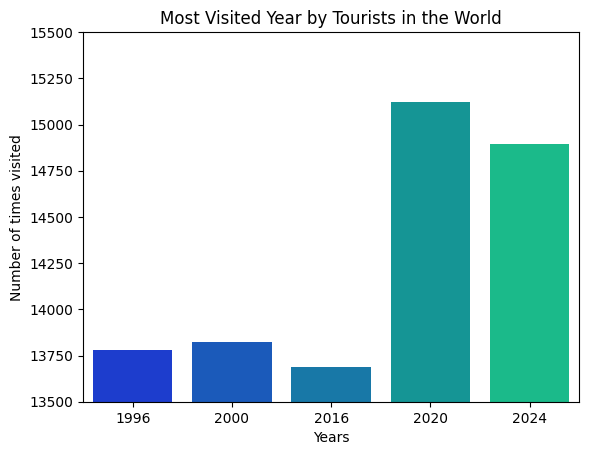

In [15]:
year_count=df['Year'].value_counts().head()
sns.barplot(x=year_count.index, y=year_count.values, palette='winter')
plt.ylim(13500,15500)
plt.title('Most Visited Year by Tourists in the World')
plt.xlabel('Years')
plt.ylabel('Number of times visited')

In [16]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
